## Import necessary modules
Run this cell before running any other cells

In [328]:
%reload_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import matplotlib.pyplot as plt

LOG.propagate = False

# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2024-10-19 10:06:26,179 | INFO     |: Looking for Artemis Nano Peripheral Device: c0:ec:f2:c2:23:04
2024-10-19 10:06:29,052 | INFO     |: Connected to c0:ec:f2:c2:23:04


In [329]:
# Notification Handler
def notification_handler(uuid, byte_array):
    global time_list, roll_a, pitch_a, roll_al, pitch_al, roll_g, pitch_g, yaw_g, roll_c, pitch_c, yaw_c
    rx_string = ble.bytearray_to_string(byte_array)
    if rx_string.find(',') < 0:
        print(rx_string[2:])
    else:
        time, ra, pa, rl, pl, rg, pg, yg, rc, pc, yc = rx_string.split(',')
        time_list.append(time[2:])
        
        roll_a.append(float(ra[3:]))
        pitch_a.append(float(pa[3:]))
        
        roll_al.append(float(rl[3:]))
        pitch_al.append(float(pl[3:]))
        
        roll_g.append(float(rg[3:]))
        pitch_g.append(float(pg[3:]))
        yaw_g.append(float(yg[3:]))
        
        roll_c.append(float(rc[3:]))
        pitch_c.append(float(pc[3:]))
        yaw_c.append(float(yc[3:]))
        
ble.start_notify(ble.uuid['RX_STRING'], notification_handler)

In [330]:
ble.send_command(CMD.GET_TIME_MILLIS, "")

31008


In [275]:
# rotate CCW
ble.send_command(CMD.SET_PWM, "1|250|250|1|2000")

In [294]:
# rotate CW
ble.send_command(CMD.SET_PWM, "250|1|1|250|2000")

In [278]:
# Forward 2 seconds
ble.send_command(CMD.SET_PWM, "75|0|75|0|2000")

In [293]:
# Backward 2 seconds
ble.send_command(CMD.SET_PWM, "0|75|0|75|2000")

In [295]:
# stop
ble.send_command(CMD.SET_PWM, "0|0|0|0|2000")

In [314]:
# slowest forward
ble.send_command(CMD.SET_PWM, "60|00|60|0|2000")

In [327]:
# slowest turn
ble.send_command(CMD.SET_PWM, "00|180|180|0|5000")

In [331]:
# Clear the data
time_list = []
roll_a = []
pitch_a = []
roll_al = []
pitch_al = []
roll_g = []
pitch_g = []
yaw_g = []
roll_c = []
pitch_c = []
yaw_c = []

# send the command
ble.send_command(CMD.GET_IMU_DATA, "")

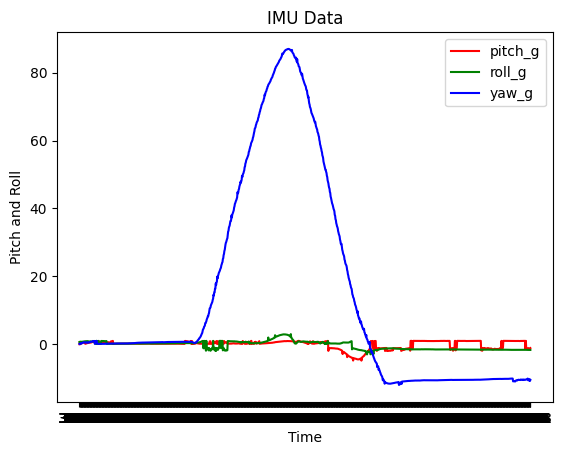

In [332]:
#plt.yticks([-180, -120, -60, 0, 60, 120, 180])
count = len(time_list)
#plt.plot(time_list[10:count-1], pitch_a[10:count-1], color='r', label='pitch_a')
#plt.plot(time_list[10:count-1], roll_a[10:count-1],  color='g', label='roll_a')

#plt.plot(time_list[10:count-1], pitch_al[10:count-1], color='c', label='pitch_al')
#plt.plot(time_list[10:count-1], roll_al[10:count-1],  color='m', label='roll_al')

plt.plot(time_list[10:count-1], pitch_g[10:count-1], color='r', label='pitch_g')
plt.plot(time_list[10:count-1], roll_g[10:count-1],  color='g', label='roll_g')
plt.plot(time_list[10:count-1], yaw_g[10:count-1],   color='b', label='yaw_g')

#plt.plot(time_list[10:count-1], pitch_c[10:count-1], color='c', label='pitch_c')
#plt.plot(time_list[10:count-1], roll_c[10:count-1],  color='m', label='roll_c')
#plt.plot(time_list[10:count-1], yaw_c[10:count-1],   color='y', label='yaw_c')

plt.title('IMU Data')
plt.xlabel('Time')
plt.ylabel('Pitch and Roll')
plt.legend()
plt.show()

## Disconnect

In [6]:
# Disconnect
ble.disconnect()

2024-08-02 13:25:58,083 | INFO     |: Disconnected from E8E0F7A4-7773-8749-3CAD-EADBED93F90E
